In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import ensemble
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import os

# 1 数据预处理
## 1.1 数据合并

In [191]:
def merge(folder,label):
    df_merged = pd.DataFrame()
    # 遍历，合并
    for label_name in os.listdir(folder):
        label_path = os.path.join(folder,label_name)
        for file_name in os.listdir(label_path):
            file_path = os.path.join(label_path,file_name)
            df = pd.read_csv(file_path,encoding='gbk')
            df_merged = df_merged.append(df,ignore_index=True)
            print("正在合并{}文件".format(file_name))
    # 存储在当前一级文件下
    file_name = label + '.csv'
    out_file = os.path.join(folder,file_name)
    df_merged.to_csv(out_file,index=False,encoding='utf-8')
    print("合并完成{}类型的文件".format(label))

In [192]:
Non_VPN_folder = "data/2_class/NonVPN"
VPN_folder = "data/2_class/VPN"


merge(Non_VPN_folder,"Non_VPN")
merge(VPN_folder,"VPN")

正在合并AIMchat1.pcap_Flow.csv文件
正在合并AIMchat2.pcap_Flow.csv文件
正在合并aim_chat_3a.pcap_Flow.csv文件
正在合并aim_chat_3b.pcap_Flow.csv文件
正在合并facebookchat1.pcap_Flow.csv文件
正在合并facebookchat2.pcap_Flow.csv文件
正在合并facebookchat3.pcap_Flow.csv文件
正在合并facebook_chat_4a.pcap_Flow.csv文件
正在合并facebook_chat_4b.pcap_Flow.csv文件
正在合并gmailchat1.pcap_Flow.csv文件
正在合并gmailchat2.pcap_Flow.csv文件
正在合并gmailchat3.pcap_Flow.csv文件
正在合并hangouts_chat_4a.pcap_Flow.csv文件
正在合并hangout_chat_4b.pcap_Flow.csv文件
正在合并ICQchat1.pcap_Flow.csv文件
正在合并ICQchat2.pcap_Flow.csv文件
正在合并icq_chat_3a.pcap_Flow.csv文件
正在合并icq_chat_3b.pcap_Flow.csv文件
正在合并skype_chat1a.pcap_Flow.csv文件
正在合并skype_chat1b.pcap_Flow.csv文件
正在合并email1a.pcap_Flow.csv文件
正在合并email1b.pcap_Flow.csv文件
正在合并email2a.pcap_Flow.csv文件
正在合并email2b.pcap_Flow.csv文件
正在合并ftps_down_1a.pcap_Flow.csv文件
正在合并ftps_down_1b.pcap_Flow.csv文件
正在合并ftps_up_2a.pcap_Flow.csv文件
正在合并ftps_up_2b.pcap_Flow.csv文件
正在合并scp1.pcap_Flow.csv文件
正在合并scpDown1.pcap_Flow.csv文件
正在合并scpDown2.pcap_Flow.csv文件
正在合并scpDown3.pcap_Flow.cs

In [193]:
df_Non_VPN = pd.read_csv('data/2_class/NonVPN/Non_VPN.csv')
df_VPN = pd.read_csv('data/2_class/VPN/VPN.csv')



## 1.2 数据清理，重复值，缺失值处理

In [194]:
df_Non_VPN.head(10)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,131.202.240.87-64.12.104.73-1258-443-6,131.202.240.87,1258,64.12.104.73,443,6,15/04/2015 10:14:23 下午,119999581,2,3,...,0,5.243150e+04,5.734636e+02,52837.0,52026.0,5.994736e+07,4.879037e+02,59947704.0,59947014.0,No Label
1,131.202.240.87-64.12.104.85-1254-443-6,131.202.240.87,1254,64.12.104.85,443,6,15/04/2015 10:14:23 下午,119999899,11,13,...,0,1.132177e+06,1.665046e+06,3378621.0,20232.0,1.886781e+07,1.293738e+07,40602165.0,8405794.0,No Label
2,131.202.240.87-64.12.104.73-13389-443-6,131.202.240.87,13389,64.12.104.73,443,6,15/04/2015 10:14:27 下午,60054835,1,3,...,0,5.296800e+04,0.000000e+00,52968.0,52968.0,5.994906e+07,0.000000e+00,59949058.0,59949058.0,No Label
3,131.202.240.87-64.12.24.167-13385-443-6,131.202.240.87,13385,64.12.24.167,443,6,15/04/2015 10:14:27 下午,87805460,12,14,...,0,3.712991e+06,3.555993e+06,7114375.0,20308.0,2.438451e+07,1.820219e+07,45086942.0,10890558.0,No Label
4,131.202.240.87-178.237.19.228-13407-443-6,131.202.240.87,13407,178.237.19.228,443,6,15/04/2015 10:14:29 下午,119998971,4,5,...,0,1.680420e+05,1.891613e+02,168275.0,167828.0,2.983170e+07,6.525541e+02,29832657.0,29831207.0,No Label
5,131.202.240.87-178.237.19.103-13404-443-6,131.202.240.87,13404,178.237.19.103,443,6,15/04/2015 10:14:29 下午,119999431,4,5,...,0,1.748422e+05,3.024967e+02,175290.0,174632.0,2.982502e+07,9.344747e+02,29826034.0,29823877.0,No Label
6,131.202.240.87-178.237.19.227-13397-443-6,131.202.240.87,13397,178.237.19.227,443,6,15/04/2015 10:14:34 下午,90172994,3,5,...,0,1.733753e+05,2.015598e+02,173585.0,173183.0,2.982670e+07,6.095050e+03,29832988.0,29820818.0,No Label
7,131.202.240.87-178.237.24.202-13393-443-6,131.202.240.87,13393,178.237.24.202,443,6,15/04/2015 10:14:34 下午,90167315,3,5,...,0,1.684593e+05,1.531593e+03,170184.0,167258.0,2.983157e+07,7.436309e+03,29838505.0,29823717.0,No Label
8,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,15/04/2015 10:14:33 下午,114005968,7,1,...,0,1.184000e+03,1.013558e+02,1301.0,1123.0,3.799879e+07,8.046583e+06,46998534.0,31498681.0,No Label
9,131.202.240.87-131.202.243.255-137-137-17,131.202.240.87,137,131.202.243.255,137,17,15/04/2015 10:14:30 下午,1499698,2,1,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label


In [195]:
df_VPN.head(10)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,205.188.12.91-10.8.8.178-443-48911-6,205.188.12.91,443,10.8.8.178,48911,6,04/06/2015 02:40:21 上午,119635206,44,48,...,0,3.957300e+06,4.528673e+06,14318335.0,79.0,7.554049e+06,3.035254e+06,13798288.0,5220546.0,No Label
1,157.56.52.13-10.8.8.178-40011-56909-6,157.56.52.13,40011,10.8.8.178,56909,6,04/06/2015 02:41:09 上午,21411289,2,4,...,0,4.882010e+05,0.000000e+00,488201.0,488201.0,2.065282e+07,0.000000e+00,20652825.0,20652825.0,No Label
2,137.117.177.33-10.8.8.178-443-40023-6,10.8.8.178,40023,137.117.177.33,443,6,04/06/2015 02:43:35 上午,773763,8,8,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
3,137.117.177.33-10.8.8.178-443-40023-6,10.8.8.178,40023,137.117.177.33,443,6,04/06/2015 02:43:36 上午,228,1,1,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
4,205.188.12.91-10.8.8.178-443-48911-6,205.188.12.91,443,10.8.8.178,48911,6,04/06/2015 02:42:22 上午,119130030,35,35,...,0,2.977422e+06,3.690810e+06,9837179.0,75.0,1.328350e+07,1.093727e+07,33200492.0,5300581.0,No Label
5,134.170.25.26-10.8.8.178-443-54269-6,134.170.25.26,443,10.8.8.178,54269,6,04/06/2015 02:40:31 上午,119383580,1,4,...,0,7.700000e+01,0.000000e+00,77.0,77.0,1.191629e+08,0.000000e+00,119162872.0,119162872.0,No Label
6,157.56.52.13-10.8.8.178-40011-56909-6,157.56.52.13,40011,10.8.8.178,56909,6,04/06/2015 02:43:09 上午,64460460,5,7,...,0,3.666530e+05,1.366922e+05,463309.0,269997.0,3.159115e+07,1.539105e+07,42474266.0,20708031.0,No Label
7,205.188.12.91-10.8.8.178-443-48911-6,205.188.12.91,443,10.8.8.178,48911,6,04/06/2015 02:44:25 上午,119987953,72,73,...,0,3.019042e+06,3.487407e+06,8813749.0,206187.0,9.540389e+06,4.059562e+06,16547405.0,5997427.0,No Label
8,134.170.25.26-10.8.8.178-443-54269-6,134.170.25.26,443,10.8.8.178,54269,6,04/06/2015 02:44:31 上午,117,0,2,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
9,157.56.52.13-10.8.8.178-40011-56909-6,157.56.52.13,40011,10.8.8.178,56909,6,04/06/2015 02:45:31 上午,99260415,3,3,...,0,1.551105e+05,1.625207e+05,270030.0,40191.0,4.934000e+07,9.596102e+06,56125466.0,42554529.0,No Label


数据去重，数据除去缺失值，包括NaN值与inf值

In [196]:
print("去重前")
print(df_Non_VPN.shape)
print(df_VPN.shape)

去重前
(194868, 84)
(16661, 84)


重复值去重

In [197]:
df_Non_VPN.drop_duplicates(inplace=True)
df_VPN.drop_duplicates(inplace=True)

In [198]:
print("去重后")
print(df_Non_VPN.shape)
print(df_VPN.shape)

去重后
(194868, 84)
(16661, 84)


缺失值处理,删除NaN与inf

In [199]:
df_Non_VPN = df_Non_VPN.dropna()
df_VPN = df_VPN.dropna()


In [200]:
print("进行缺失值处理后")
print(df_Non_VPN.shape)
print(df_VPN.shape)

进行缺失值处理后
(194863, 84)
(16661, 84)


# 2 特征工程
将84维特征收敛为低维特征方便预测

## 2.1 特征编码
首先Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,这几列是记录流的ip与端口以及捕获时间，与最终标签无关，手动删除


In [201]:
df_Non_VPN = df_Non_VPN.iloc[:,7:]
df_VPN = df_VPN.iloc[:,7:]



In [202]:
print(df_Non_VPN.shape)
print(df_VPN.shape)

(194863, 77)
(16661, 77)


In [203]:
df_Non_VPN.head(10)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,119999581,2,3,148.0,74.0,74.0,74.0,74.000000,0.000000,74.0,...,0,5.243150e+04,5.734636e+02,52837.0,52026.0,5.994736e+07,4.879037e+02,59947704.0,59947014.0,No Label
1,119999899,11,13,739.0,1586.0,293.0,0.0,67.181818,85.003315,458.0,...,0,1.132177e+06,1.665046e+06,3378621.0,20232.0,1.886781e+07,1.293738e+07,40602165.0,8405794.0,No Label
2,60054835,1,3,74.0,74.0,74.0,74.0,74.000000,0.000000,74.0,...,0,5.296800e+04,0.000000e+00,52968.0,52968.0,5.994906e+07,0.000000e+00,59949058.0,59949058.0,No Label
3,87805460,12,14,681.0,1852.0,213.0,0.0,56.750000,79.876183,453.0,...,0,3.712991e+06,3.555993e+06,7114375.0,20308.0,2.438451e+07,1.820219e+07,45086942.0,10890558.0,No Label
4,119998971,4,5,24.0,6.0,6.0,6.0,6.000000,0.000000,6.0,...,0,1.680420e+05,1.891613e+02,168275.0,167828.0,2.983170e+07,6.525541e+02,29832657.0,29831207.0,No Label
5,119999431,4,5,24.0,6.0,6.0,6.0,6.000000,0.000000,6.0,...,0,1.748422e+05,3.024967e+02,175290.0,174632.0,2.982502e+07,9.344747e+02,29826034.0,29823877.0,No Label
6,90172994,3,5,18.0,6.0,6.0,6.0,6.000000,0.000000,6.0,...,0,1.733753e+05,2.015598e+02,173585.0,173183.0,2.982670e+07,6.095050e+03,29832988.0,29820818.0,No Label
7,90167315,3,5,18.0,6.0,6.0,6.0,6.000000,0.000000,6.0,...,0,1.684593e+05,1.531593e+03,170184.0,167258.0,2.983157e+07,7.436309e+03,29838505.0,29823717.0,No Label
8,114005968,7,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0,1.184000e+03,1.013558e+02,1301.0,1123.0,3.799879e+07,8.046583e+06,46998534.0,31498681.0,No Label
9,1499698,2,1,100.0,50.0,50.0,50.0,50.000000,0.000000,50.0,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label


将标签列进行特征编码
Non_VPN映射到0
VPN流量映射到1

In [204]:
df_Non_VPN['Label']  = 0
df_VPN['Label']  = 1


In [205]:
df_VPN.head(10)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,119635206,44,48,6202.0,2824.0,484.0,0.0,140.954545,129.067848,234.0,...,0,3.957300e+06,4.528673e+06,14318335.0,79.0,7.554049e+06,3.035254e+06,13798288.0,5220546.0,1
1,21411289,2,4,0.0,6.0,0.0,0.0,0.000000,0.000000,2.0,...,0,4.882010e+05,0.000000e+00,488201.0,488201.0,2.065282e+07,0.000000e+00,20652825.0,20652825.0,1
2,773763,8,8,649.0,3556.0,267.0,0.0,81.125000,115.934018,1308.0,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
3,228,1,1,0.0,37.0,0.0,0.0,0.000000,0.000000,37.0,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
4,119130030,35,35,5272.0,1826.0,420.0,0.0,150.628571,130.186989,218.0,...,0,2.977422e+06,3.690810e+06,9837179.0,75.0,1.328350e+07,1.093727e+07,33200492.0,5300581.0,1
5,119383580,1,4,149.0,470.0,149.0,149.0,149.000000,0.000000,469.0,...,0,7.700000e+01,0.000000e+00,77.0,77.0,1.191629e+08,0.000000e+00,119162872.0,119162872.0,1
6,64460460,5,7,13.0,10.0,10.0,0.0,2.600000,4.335897,4.0,...,0,3.666530e+05,1.366922e+05,463309.0,269997.0,3.159115e+07,1.539105e+07,42474266.0,20708031.0,1
7,119987953,72,73,11920.0,2356.0,420.0,0.0,165.555556,123.713081,218.0,...,0,3.019042e+06,3.487407e+06,8813749.0,206187.0,9.540389e+06,4.059562e+06,16547405.0,5997427.0,1
8,117,0,2,0.0,1.0,0.0,0.0,0.000000,0.000000,1.0,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
9,99260415,3,3,2.0,4.0,2.0,0.0,0.666667,1.154701,2.0,...,0,1.551105e+05,1.625207e+05,270030.0,40191.0,4.934000e+07,9.596102e+06,56125466.0,42554529.0,1


很好，现在已经全部是数字类型了，现在合并数据集

In [206]:
data = pd.DataFrame()
data = data.append(df_VPN)
data = data.append(df_Non_VPN)
print(data.shape)

(211524, 77)


In [207]:
X = data.iloc[:, :-1]  # 选取所有行，除了最后一列以外的所有列作为特征
y = data.iloc[:, -1]   # 选取所有行，最后一列作为标签

In [208]:
print(X.shape)
print(y.shape)

(211524, 76)
(211524,)


查看特征描述

In [209]:
X.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.115240e+05,211524.000000,211524.000000,2.115240e+05,2.115240e+05,211524.000000,211524.000000,211524.000000,211524.000000,211524.000000,...,211524.000000,211524.0,2.115240e+05,2.115240e+05,2.115240e+05,2.115240e+05,2.115240e+05,2.115240e+05,2.115240e+05,2.115240e+05
mean,1.003206e+07,54.768641,65.488328,4.234968e+04,5.592605e+04,66.602414,23.223629,35.364694,12.758944,91.176377,...,33.590429,0.0,1.800153e+05,9.443392e+04,3.015242e+05,1.073498e+05,3.806053e+06,2.974142e+05,4.075604e+06,3.553331e+06
std,2.916630e+07,1559.064118,2762.325247,3.626545e+06,3.740303e+06,920.483207,30.866179,296.492943,187.751152,566.699164,...,731.188832,0.0,2.004644e+06,1.204375e+06,3.002680e+06,1.633785e+06,1.459907e+07,2.738837e+06,1.525688e+07,1.427299e+07
min,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.107200e+05,1.000000,1.000000,2.200000e+01,2.200000e+01,22.000000,22.000000,22.000000,0.000000,22.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.127300e+05,1.000000,1.000000,2.200000e+01,2.200000e+01,22.000000,22.000000,22.000000,0.000000,22.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.208770e+05,1.000000,1.000000,2.200000e+01,2.200000e+01,22.000000,22.000000,22.000000,0.000000,22.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,238160.000000,470863.000000,1.079183e+09,6.704287e+08,65160.000000,1350.000000,28503.425009,19074.915609,48168.000000,...,62415.000000,0.0,1.130879e+08,6.720255e+07,1.130879e+08,1.130879e+08,1.199994e+08,7.694450e+07,1.199994e+08,1.199994e+08


再舍去两个特征

In [210]:
X = X.drop(['Flow Byts/s','Flow Pkts/s'],axis = 1)
X.shape

(211524, 74)

最大最小归一化

In [211]:

from sklearn.preprocessing import minmax_scale

X = minmax_scale(X)

In [212]:
X

array([[9.96960050e-01, 1.84749748e-04, 9.98169315e-05, ...,
        3.94473086e-02, 1.14986279e-01, 4.35047563e-02],
       [1.78427408e-01, 8.39771582e-06, 6.37129350e-06, ...,
        0.00000000e+00, 1.72107691e-01, 1.72107691e-01],
       [6.44802500e-03, 3.35908633e-05, 1.48663515e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.42587500e-03, 4.19885791e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.41357500e-03, 4.19885791e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.42213333e-03, 4.19885791e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

基于随机森林特征选择方法对特征重要度进行评分


In [213]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X,y)

# 获取特征重要性评分
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # 对特征重要性得分进行降序排列

# 打印特征重要性评分
for f in range(X.shape[1]):
    print("%d. 特征 %d (%f)" % (f + 1, indices[f], importances[indices[f]]))




1. 特征 32 (0.313854)
2. 特征 34 (0.165038)
3. 特征 26 (0.137010)
4. 特征 35 (0.048376)
5. 特征 63 (0.032425)
6. 特征 36 (0.021569)
7. 特征 0 (0.021495)
8. 特征 16 (0.018154)
9. 特征 69 (0.016658)
10. 特征 9 (0.016084)
11. 特征 33 (0.013822)
12. 特征 13 (0.010615)
13. 特征 37 (0.009791)
14. 特征 23 (0.009602)
15. 特征 15 (0.009590)
16. 特征 12 (0.009508)
17. 特征 14 (0.008694)
18. 特征 49 (0.008580)
19. 特征 31 (0.008119)
20. 特征 25 (0.007991)
21. 特征 38 (0.007774)
22. 特征 22 (0.007154)
23. 特征 10 (0.007102)
24. 特征 11 (0.006547)
25. 特征 51 (0.006166)
26. 特征 21 (0.005819)
27. 特征 39 (0.004809)
28. 特征 48 (0.004030)
29. 特征 58 (0.004009)
30. 特征 1 (0.004002)
31. 特征 24 (0.003848)
32. 特征 17 (0.003656)
33. 特征 20 (0.003213)
34. 特征 44 (0.003019)
35. 特征 18 (0.002999)
36. 特征 6 (0.002719)
37. 特征 8 (0.002573)
38. 特征 19 (0.002502)
39. 特征 5 (0.002475)
40. 特征 73 (0.002365)
41. 特征 68 (0.002206)
42. 特征 42 (0.002202)
43. 特征 50 (0.001961)
44. 特征 7 (0.001914)
45. 特征 71 (0.001838)
46. 特征 72 (0.001785)
47. 特征 66 (0.001707)
48. 特征 70 (0.001643)
49. 特征 6

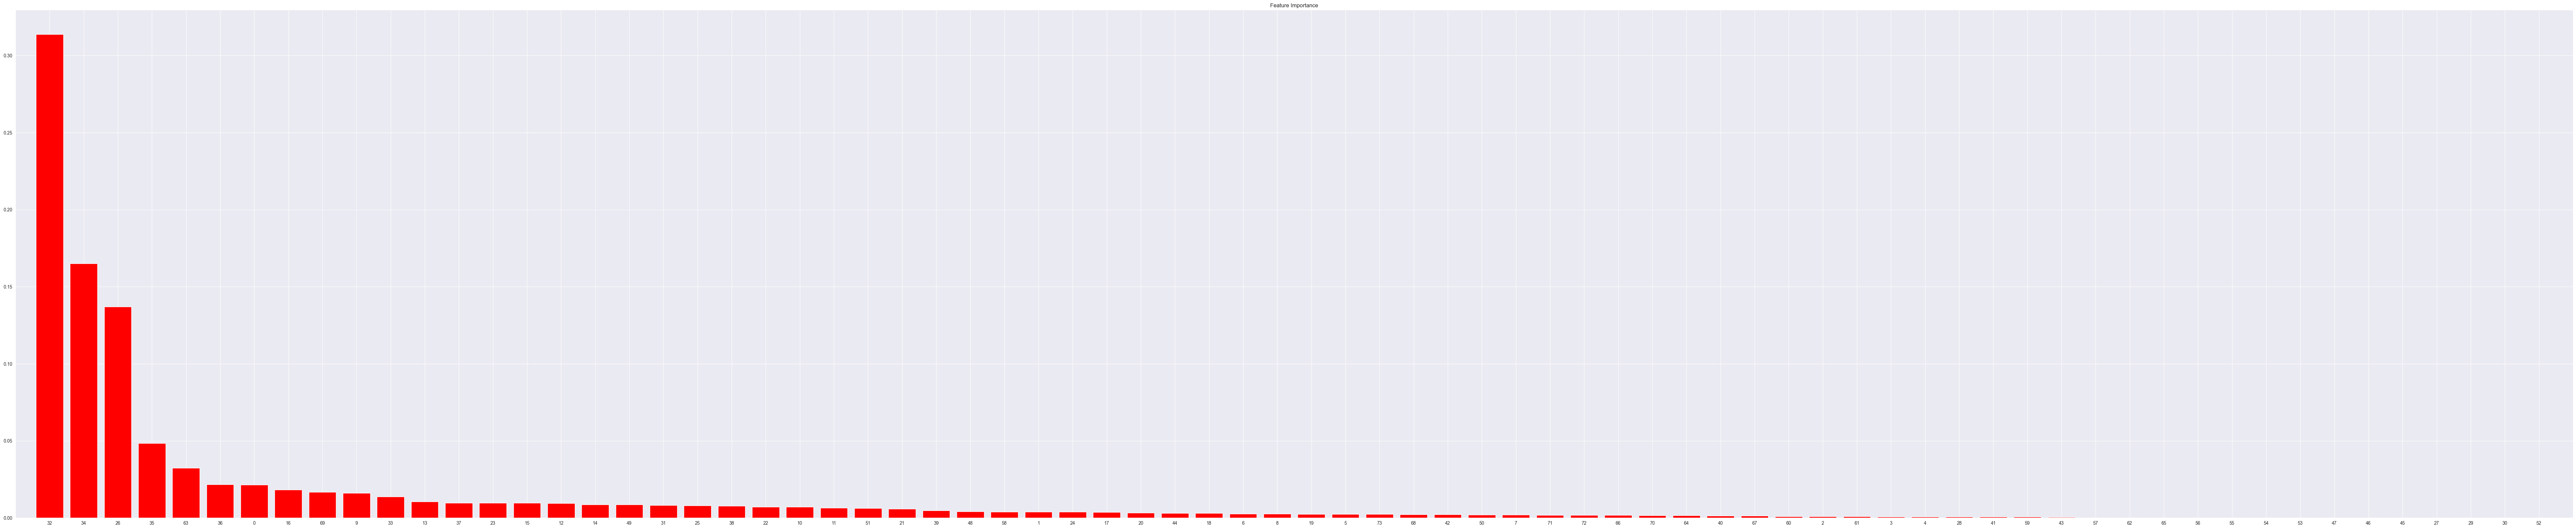

In [214]:
# 作图
plt.figure(figsize=(100,20))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


选择重要度大于0.0090的特征

In [215]:
# 将特征评分大于 0.009 的特征作为最终特征
final_features = [indices[i] for i in range(len(importances)) if importances[indices[i]] > 0.009]



In [216]:
print(final_features)

[32, 34, 26, 35, 63, 36, 0, 16, 69, 9, 33, 13, 37, 23, 15, 12]


In [217]:
X = X[:,final_features]

In [218]:
X = pd.DataFrame(X)
X.shape

(211524, 16)

In [219]:
# 数据分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [220]:
print(X_train.shape)
print(X_test.shape)

(169219, 16)
(42305, 16)


In [221]:
#对训练集样本过采样
X_train, y_train = SMOTE().fit_resample(X_train,y_train)
y_train.value_counts()



1    155852
0    155852
Name: Label, dtype: int64

In [222]:
X_train.shape

(311704, 16)

In [223]:
GBDT_n_estimators = [120, 300]
GBDT_learning_rate = [0.001, 0.01]
GBDT_max_features = ['sqrt']
GBDT_max_depth = [3, 5, 8]


param_grid = {
    'n_estimators': GBDT_n_estimators,
    'learning_rate': GBDT_learning_rate,
    'max_features': GBDT_max_features,
    'max_depth': GBDT_max_depth,

}
cv_split = model_selection.ShuffleSplit(n_splits=10,
                                        test_size=.2,
                                        random_state=42)
model_tunning = GridSearchCV(ensemble.GradientBoostingClassifier(),
                             param_grid=param_grid,
                             cv=cv_split,
                             scoring='roc_auc')
model_tunning.fit(X_train,y_train)
print('最优分数', model_tunning.best_score_)  #模型最高分
print('最优参数', model_tunning.best_params_)  #最优参数
print('最优模型', model_tunning.best_estimator_)  #最优模型
best_model = model_tunning.best_estimator_

最优分数 0.9777339459014653
最优参数 {'learning_rate': 0.01, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}
最优模型 GradientBoostingClassifier(learning_rate=0.01, max_depth=8, max_features='sqrt',
                           n_estimators=300)


acc:0.949
precision:0.965
recall:0.949
f1-score:0.954


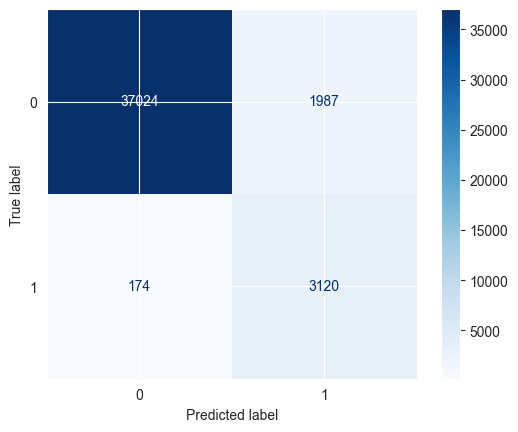

In [228]:
# GBDT梯度提示决策树

y_predict = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
print("acc:{0:.3}".format(accuracy_score(y_test, y_predict)))  #精度
print("precision:{0:.3}".format(precision_score(y_test, y_predict, average='weighted')))  #准确率
print("recall:{0:.3}".format(recall_score(y_test, y_predict,average='weighted')))  #召回率
print("f1-score:{0:.3}".format(f1_score(y_test,y_predict,average='weighted')))# F1




In [226]:
#混淆矩阵
#### svm
from sklearn import svm
model = svm.SVC(gamma='scale', C=1.0, decision_function_shape='ovr', kernel='rbf')

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
print("acc:{0:.3}".format(accuracy_score(y_test, y_predict)))  #精度
print("precision:{0:.3}".format(precision_score(y_test, y_predict, average='weighted')))  #准确率
print("recall:{0:.3}".format(recall_score(y_test, y_predict,average='weighted')))  #召回率
print("f1-score:{0:.3}".format(f1_score(y_test,y_predict,average='weighted')))# F1


KeyboardInterrupt: 

acc:0.868
precision:0.925
recall:0.868
f1-score:0.889


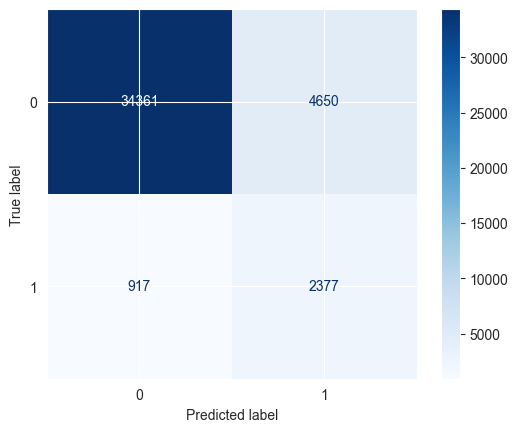

In [227]:
#混淆矩阵
#### 逻辑回归
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
            penalty="l1",C=0.5,solver="liblinear"
        )

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
print("acc:{0:.3}".format(accuracy_score(y_test, y_predict)))  #精度
print("precision:{0:.3}".format(precision_score(y_test, y_predict, average='weighted')))  #准确率
print("recall:{0:.3}".format(recall_score(y_test, y_predict,average='weighted')))  #召回率
print("f1-score:{0:.3}".format(f1_score(y_test,y_predict,average='weighted')))# F1